In [48]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

img_filepath = './data/gate_detection/'

os.listdir(img_filepath)

['arena-2017.jpg', 'gate-2016.jpg']

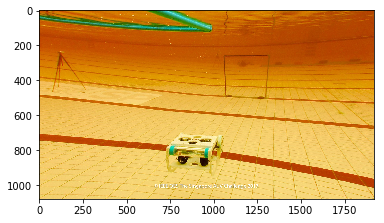

In [63]:
img = cv2.imread(img_filepath + 'arena-2017.jpg')
img_copy = img.copy()
plt.imshow(img)

In [8]:
# Vertical Line Extraction Filters

sobel_y = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")

sobel_y_tall = np.array((
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]), dtype="int")

sobel_y_tall_wide = np.array((
    [-1, 0, 0, 1],
    [-1, 0, 0, 1],
    [-1, 0, 0, 1],
    [-1, 0, 0, 1],
    [-1, 0, 0, 1]), dtype="int")

In [9]:
edges = cv2.filter2D(img, -1, sobel_y_tall_wide)

In [10]:
edges_gray = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)

In [11]:
cv2.imwrite("edges_gray_sobel_tall_wide.jpg", edges_gray)

True

In [12]:
_, edges_thresh = cv2.threshold(edges_gray, 50, 255, cv2.THRESH_BINARY)

In [13]:
cv2.imwrite("edges_gray_sobel_tall_wide_thresh.jpg", edges_thresh)

True

In [20]:
kernel = np.ones((9, 3), np.uint8)

In [19]:
edges_open = cv2.morphologyEx(edges_thresh, cv2.MORPH_OPEN, kernel)

In [20]:
cv2.imwrite("edges_gray_sobel_tall_wide_open.jpg", edges_open)

True

In [3]:
mser = cv2.MSER_create()

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
regions, _ = mser.detectRegions(gray)

In [6]:
for p in regions:
    xmax, ymax = np.amax(p, axis=0)
    xmin, ymin = np.amin(p, axis=0)
    cv2.rectangle(img_copy, (xmin,ymax), (xmax,ymin), (0, 255, 0), 1)

In [7]:
cv2.imwrite("mser.jpg", img_copy)

True

In [50]:
b,g,r = cv2.split(img)

In [7]:
cv2.imwrite('b_2.jpg', b)
cv2.imwrite('g_2.jpg', g)
cv2.imwrite('r_2.jpg', r)

True

In [24]:
b = cv2.imread('./b.jpg', 0)

In [28]:
_, b_thresh = cv2.threshold(b, 200, 255, cv2.THRESH_BINARY_INV)

In [29]:
cv2.imwrite('b_thresh.jpg', b_thresh)

True

In [51]:
left_gradient_filter = np.array((
    [1, 1, 1, -1, -1, -1],
    [1, 1, 1, -1, -1, -1],
    [1, 1, 1, -1, -1, -1],
    [1, 1, 1, -1, -1, -1],
    [1, 1, 1, -1, -1, -1],
    [1, 1, 1, -1, -1, -1],
    [1, 1, 1, -1, -1, -1],
    [1, 1, 1, -1, -1, -1]), dtype="int")

top_gradient_filter = np.array((
    [-1,-1,-1,-1,-1,-1,-1],
    [-1,-1,-1,-1,-1,-1,-1],
    [-1,-1,-1,-1,-1,-1,-1],
    [-1,-1,-1,-1,-1,-1,-1],
    [-1,-1,-1,-1,-1,-1,-1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1]), dtype = "int")

In [52]:
left_edges = cv2.filter2D(b, -1, left_gradient_filter)

In [27]:
top_edges = cv2.filter2D(b, -1, top_gradient_filter)

In [33]:
cv2.imwrite('left_edges_2.jpg', left_edges)

True

In [28]:
cv2.imwrite('top_edges.jpg', top_edges)

True

In [53]:
opening = cv2.morphologyEx(left_edges, cv2.MORPH_OPEN, kernel)

In [35]:
cv2.imwrite('left_gradient_opening_2.jpg', opening)

True

In [58]:
_, opening_thresh = cv2.threshold(opening, 200, 255, cv2.THRESH_BINARY)

In [59]:
cv2.imwrite('left_gradient_opening_thresh.jpg', opening_thresh)

True

In [64]:
minLineLength = 1000
maxLineGap = 5
lines = cv2.HoughLinesP(opening_thresh,1,np.pi/360,100,minLineLength,maxLineGap)

In [65]:
for pts in lines:
    x1,y1,x2,y2 = pts[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('houghlines5.jpg',img)

True

In [44]:
lines[0]

array([[1936,  371, 1949,  358]], dtype=int32)